In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display_html,HTML

In [2]:
#data
data = pd.read_csv('/home/j/J Files/Top 10/Data/data.csv',index_col= None, delimiter=";")
data.tail(10).style.background_gradient(cmap='Wistia')

In [3]:
data.shape

(1048572, 11)

In [4]:
#checking for null values
data.isnull().any()

Keyword                  False
Liverpool F.C            False
Real Madrid C.F          False
Flamengo                 False
FC Barcelona             False
Manchester United F.C    False
Chelsea F.C              False
Juventus F.C             False
Paris Saint-Germain      False
Manchester City F.C      False
Arsenal F.C              False
dtype: bool

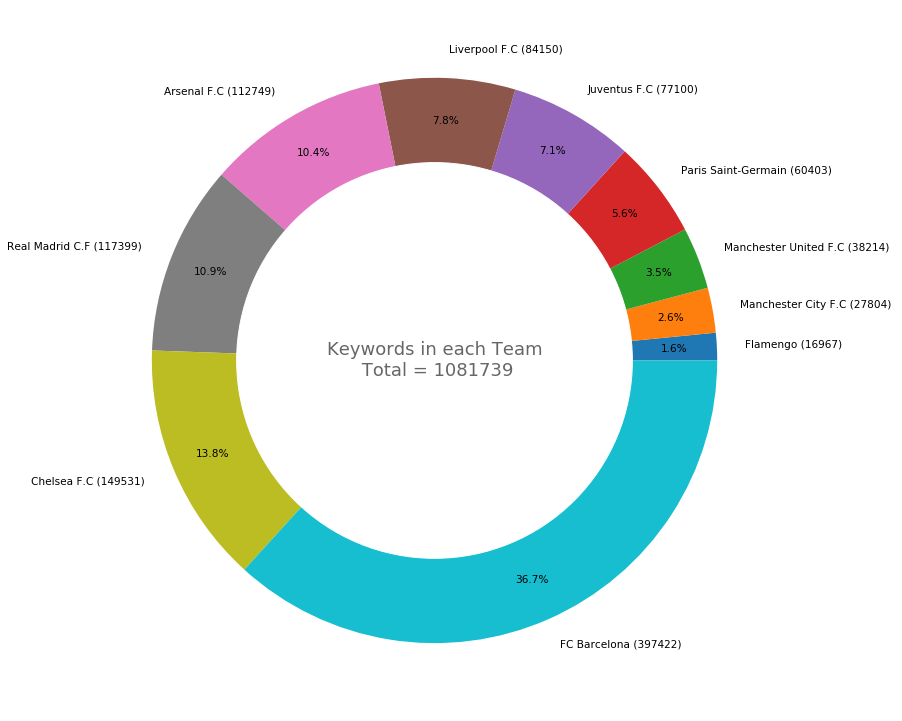

In [5]:
#pie plot showing the distribution of Keywords
team = data.iloc[:,1:].sum()
team = team.sort_values()
pie = pd.DataFrame(team,columns=['Values'])
labels = [pie.index[i] +" (" + str(int(pie.Values[i])) +") "for i in range(pie.shape[0])]

f = plt.figure(figsize=(15,13))
ax = f.add_subplot(1,1,1) 
plt.pie(pie.Values, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0.5,0.5,"Keywords in each Team"+ "\n Total = "+str(pie["Values"].sum()), 
         horizontalalignment='center',verticalalignment='center', size=18, alpha = 0.6,transform=ax.transAxes)

plt.show()

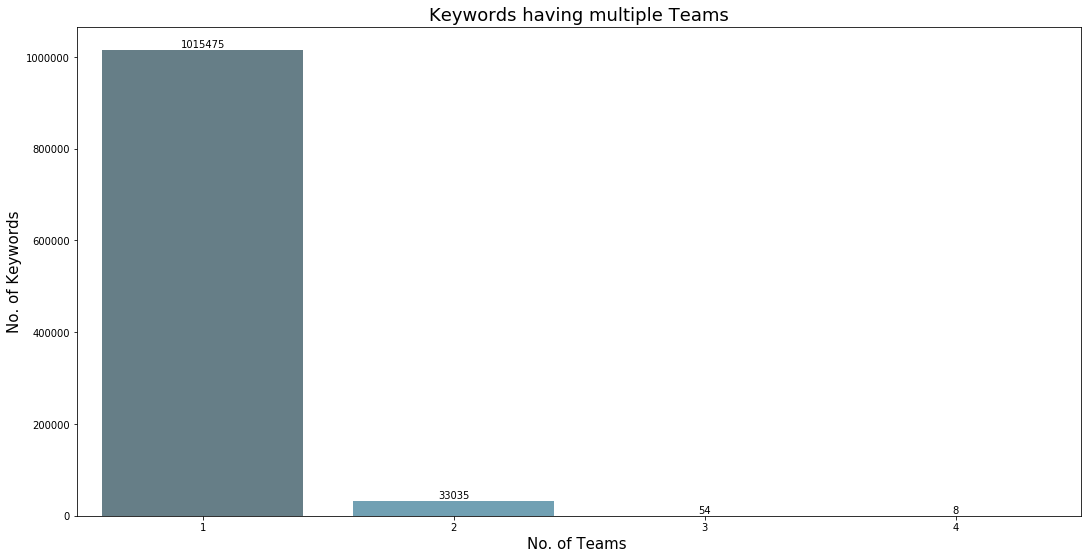

In [6]:
#number of comments having multiple labels
rowSums = data.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts

plt.figure(figsize=(18,9))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, alpha=0.8,palette="GnBu_d")
plt.title("Keywords having multiple Teams", fontsize=18)
plt.ylabel('No. of Keywords', fontsize=15)
plt.xlabel('No. of Teams ', fontsize=15)

rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

(10.0, 0.0)

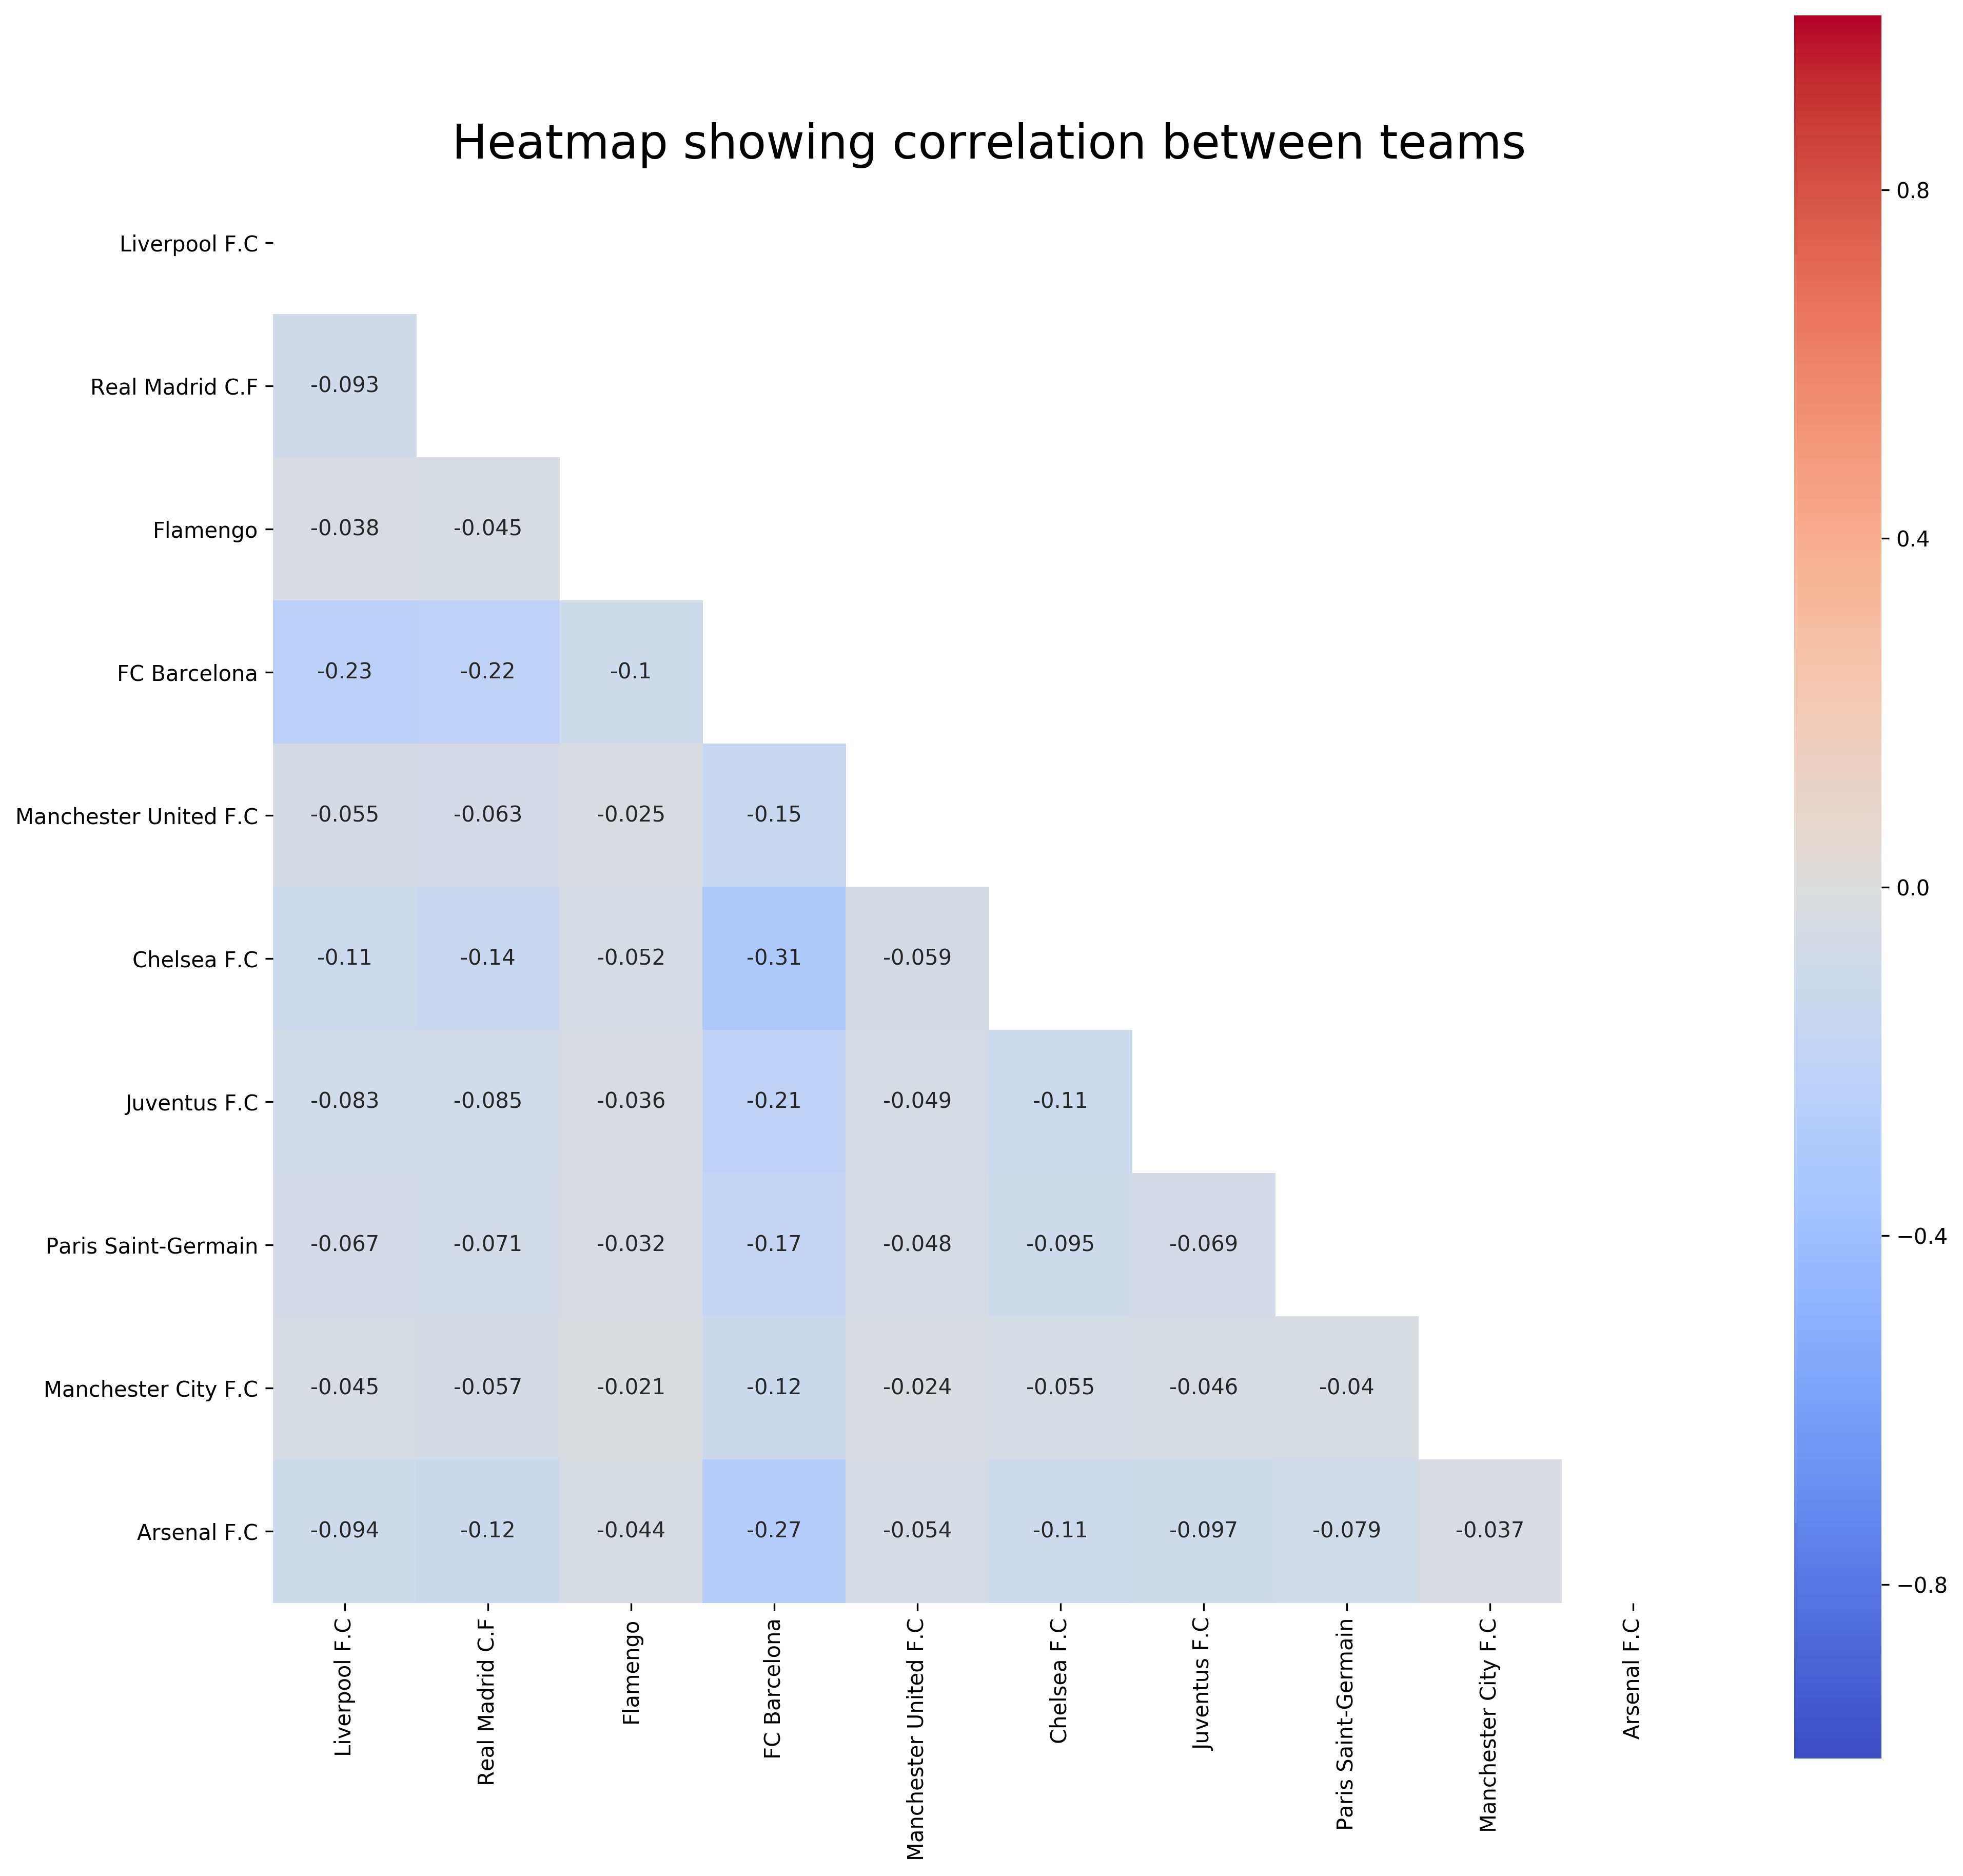

In [7]:
#heatmap - correlation bt teams
temp_data = data.iloc[:,1:]
corr=temp_data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(15,15),dpi=300)
plt.title('Heatmap showing correlation between teams',fontsize=22)
ax = sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            square=True,
            vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm',
            mask=mask)

ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

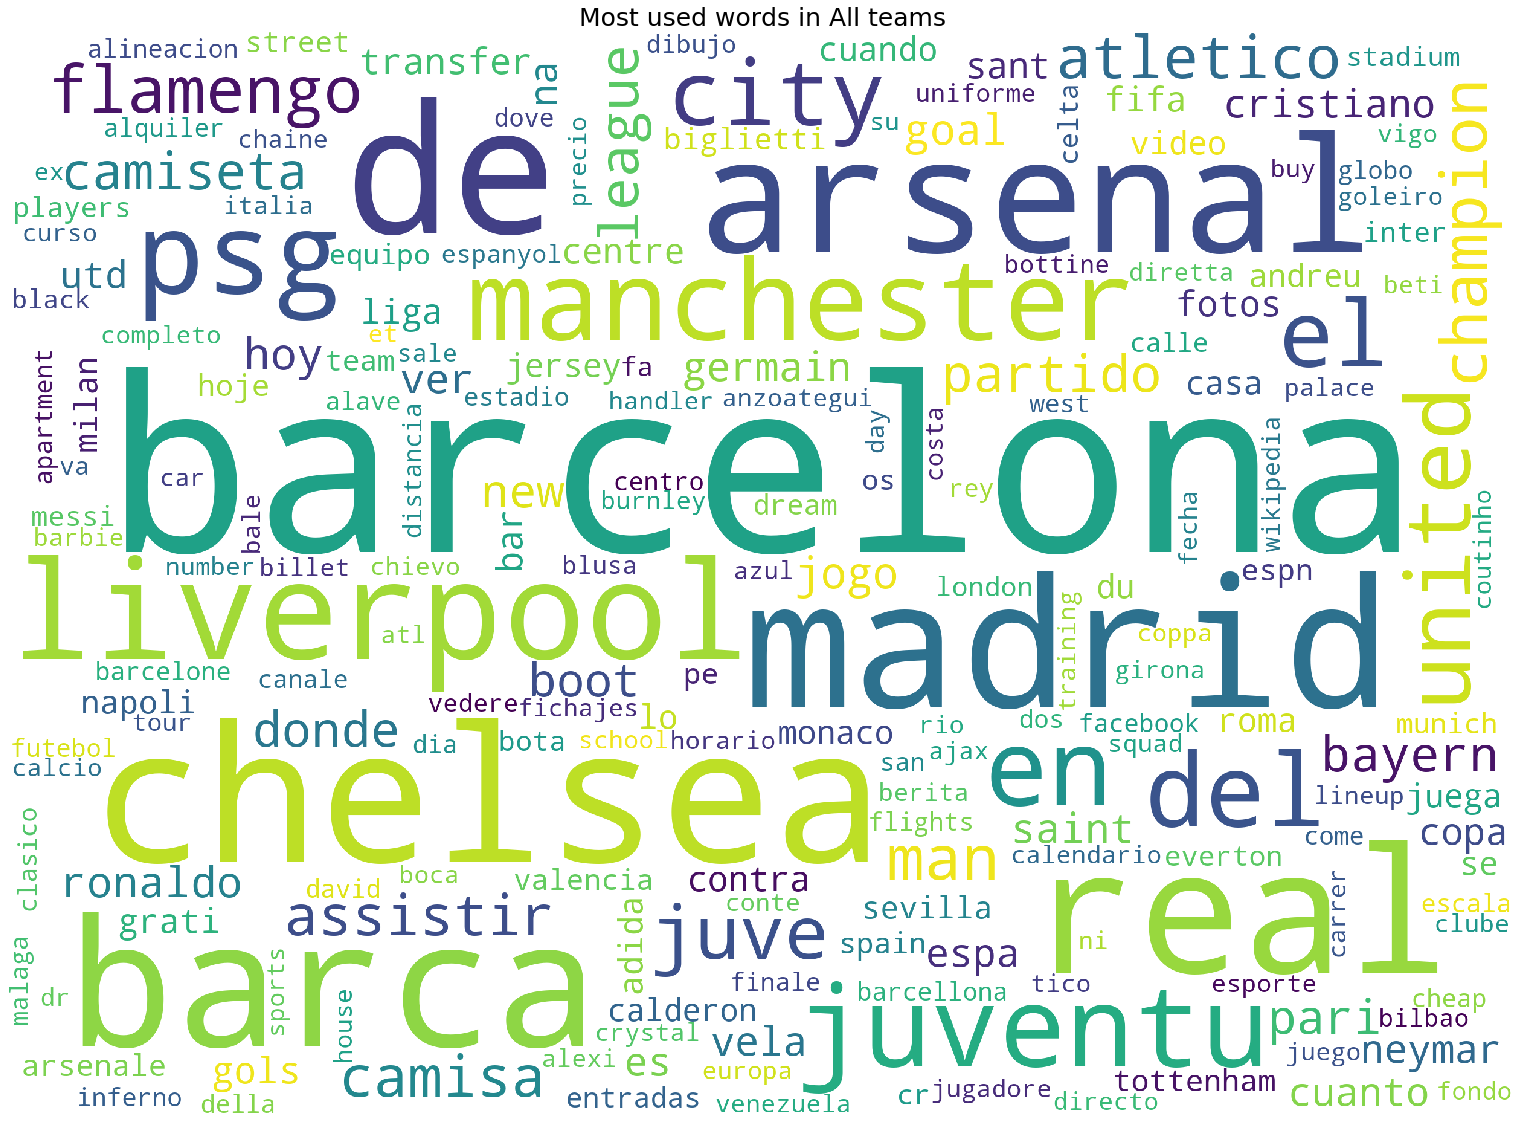

In [8]:
#wordCloud
plt.figure(figsize=(35,20))

text = data.Keyword.values
cloud_text = WordCloud(
                       stopwords=STOPWORDS,
                       background_color='white',
                       collocations=False,
                       width=2500,
                       height=1800
                      ).generate(" ".join(text))
plt.axis('off')
plt.title("Most used words in All teams",fontsize=25)
plt.imshow(cloud_text)
plt.show()

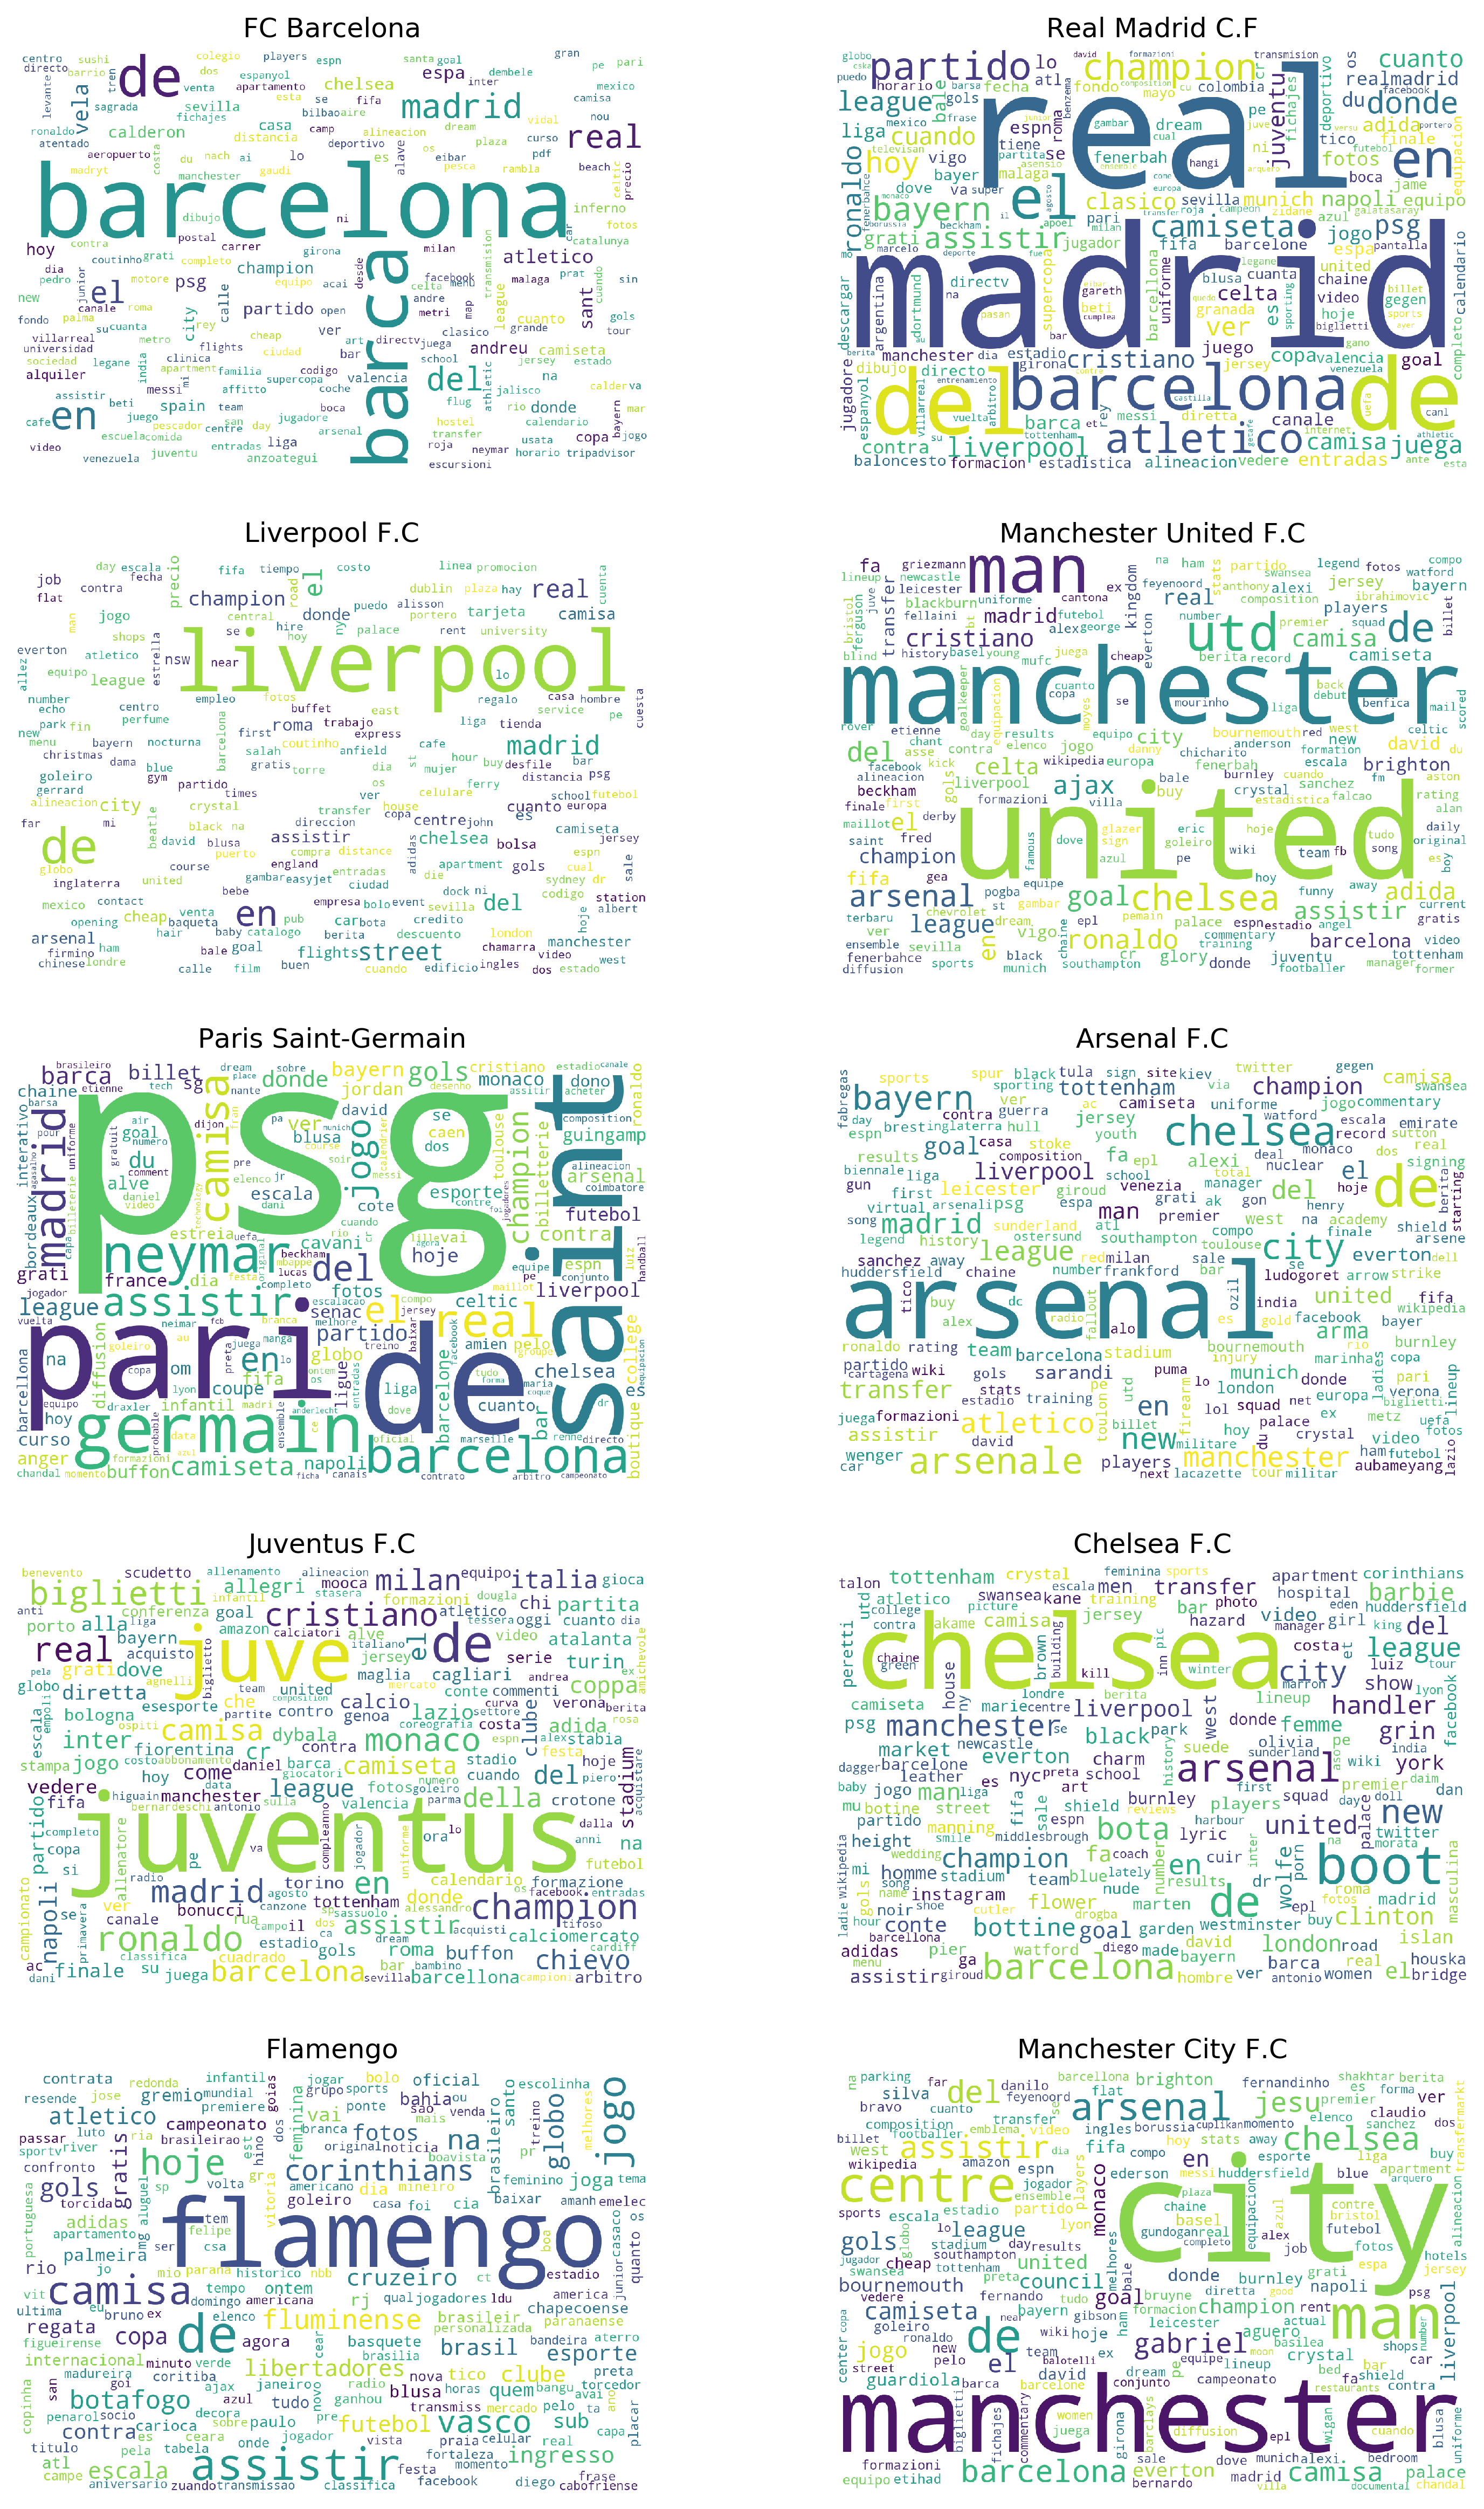

In [9]:
#wordCloud of each team
gridspec.GridSpec(5,2)
plt.figure(figsize=(12,20),dpi=300)
plt.tight_layout()

plt.subplot2grid((5,2),(0,0))
subset=data[data['FC Barcelona']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("FC Barcelona",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)
##
plt.subplot2grid((5,2),(0,1))
subset=data[data['Real Madrid C.F']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("Real Madrid C.F",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)
##
plt.subplot2grid((5,2),(1,0))
subset=data[data['Liverpool F.C']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("Liverpool F.C",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)
##
plt.subplot2grid((5,2),(1,1))
subset=data[data['Manchester United F.C']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("Manchester United F.C",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)
##
plt.subplot2grid((5,2),(2,0))
subset=data[data['Paris Saint-Germain']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("Paris Saint-Germain",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)
##
plt.subplot2grid((5,2),(2,1))
subset=data[data['Arsenal F.C']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("Arsenal F.C",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)

plt.subplot2grid((5,2),(3,0))
subset=data[data['Juventus F.C']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("Juventus F.C",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)
##
plt.subplot2grid((5,2),(3,1))
subset=data[data['Chelsea F.C']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("Chelsea F.C",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)
##
plt.subplot2grid((5,2),(4,0))
subset=data[data['Flamengo']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("Flamengo",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)
##
plt.subplot2grid((5,2),(4,1))
subset=data[data['Manchester City F.C']==1]
text=subset.Keyword.values
cloud_text = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1500, height=1000
                         ).generate(" ".join(text))
plt.axis("off")
plt.title("Manchester City F.C",fontsize=12)
plt.imshow(cloud_text,alpha=0.98)
plt.show()

In [10]:
Barcelona = data[data['FC Barcelona']==1]['Keyword'].values
Liverpool = data[data['Liverpool F.C']==1]['Keyword'].values
Real_madrid = data[data['Real Madrid C.F']==1]['Keyword'].values
Flamengo = data[data['Flamengo']==1]['Keyword'].values
Manchester_united = data[data['Manchester United F.C']==1]['Keyword'].values
Chelsea = data[data['Chelsea F.C']==1]['Keyword'].values
Juventus = data[data['Juventus F.C']==1]['Keyword'].values
Psg = data[data['Paris Saint-Germain']==1]['Keyword'].values
Manchester_city = data[data['Manchester City F.C']==1]['Keyword'].values
Arsenal = data[data['Arsenal F.C']==1]['Keyword'].values
all_teams = data['Keyword'].values

In [11]:
#TF-IDF
tf = TfidfVectorizer( strip_accents='unicode',analyzer='word',ngram_range=(1,1),
            use_idf=True,smooth_idf=True,sublinear_tf=True,
            stop_words = 'english')

def to_tfidf(team):
    tvec_weights = tf.fit_transform(team)
    weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'Term': tf.get_feature_names(), 'Weight': weights})
    return(weights_df.sort_values(by='Weight', ascending=False).head(10).reset_index(drop=True))

barcelona_idf = to_tfidf(Barcelona)
real_madrid_idf = to_tfidf(Real_madrid)
liverpool_idf = to_tfidf(Liverpool)
flamengo_idf = to_tfidf(Flamengo)
man_utd_idf = to_tfidf(Manchester_united)
chelsea_idf = to_tfidf(Chelsea)
juventus_idf = to_tfidf(Juventus)
psg_idf = to_tfidf(Psg)
manchester_cty_idf = to_tfidf(Manchester_city)
arsenal_idf = to_tfidf(Arsenal)
all_team_idf = to_tfidf(all_teams)

In [12]:
#terms with high TF-IDF values in each team
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

display_side_by_side([barcelona_idf,
                    real_madrid_idf,
                    liverpool_idf,
                    flamengo_idf,
                    man_utd_idf,
                    chelsea_idf,
                    juventus_idf,
                    psg_idf,
                    manchester_cty_idf,
                    arsenal_idf,
                    all_team_idf], ['barcelona',
                                    'real_madrid',
                                    'liverpool',
                                    'flamengo',
                                    'man_utd',
                                    'chelsea',
                                    'juventus',
                                    'psg',
                                    'manchester_cty',
                                    'arsenal',
                                    'all_team'])

In [13]:
#barPlot showing TF-IDF ranking
plt.figure(figsize=(25,30),dpi=300)
gridspec.GridSpec(6,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
sns.set(font_scale = 1.5)
plt.suptitle("TF-IDF ranking ",weight='bold',fontsize=25)

plt.subplot2grid((6,2),(0,0),colspan=2)
sns.barplot(all_team_idf.Weight,all_team_idf.Term,orient = 'h')
plt.title("All Keywords",fontsize=18)
plt.xlabel('')
plt.ylabel('Terms',weight='bold', fontsize=15)

plt.subplot2grid((6,2),(1,0))
sns.barplot(barcelona_idf.Weight,barcelona_idf.Term,orient = 'h')
plt.title("Barcelona",fontsize=18)
plt.xlabel('')
plt.ylabel('Terms',weight='bold', fontsize=15)

plt.subplot2grid((6,2),(1,1))
sns.barplot(real_madrid_idf.Weight,real_madrid_idf.Term,orient = 'h')
plt.title("Real Madrid",fontsize=18)
plt.xlabel('')
plt.ylabel('')

plt.subplot2grid((6,2),(2,0))
sns.barplot(liverpool_idf.Weight,liverpool_idf.Term,orient = 'h')
plt.title("Liverpool",fontsize=18)
plt.xlabel('',)
plt.ylabel('Terms',weight='bold', fontsize=15)

plt.subplot2grid((6,2),(2,1))
sns.barplot(flamengo_idf.Weight,flamengo_idf.Term,orient = 'h')
plt.title("Flamengo",fontsize=18)
plt.xlabel('')
plt.ylabel('')

plt.subplot2grid((6,2),(3,0))
sns.barplot(man_utd_idf.Weight,man_utd_idf.Term,orient = 'h')
plt.title("Manchester United",fontsize=18)
plt.xlabel('')
plt.ylabel('Terms',weight='bold', fontsize=15)

plt.subplot2grid((6,2),(3,1))
sns.barplot(chelsea_idf.Weight,chelsea_idf.Term,orient = 'h')
plt.title("Chelsea",fontsize=18)
plt.xlabel('')
plt.ylabel('')

plt.subplot2grid((6,2),(4,0))
sns.barplot(juventus_idf.Weight,juventus_idf.Term,orient = 'h')
plt.title("Juventus",fontsize=18)
plt.xlabel('')
plt.ylabel('Terms',weight='bold', fontsize=15)

plt.subplot2grid((6,2),(4,1))
sns.barplot(psg_idf.Weight,psg_idf.Term,orient = 'h')
plt.title("PSG",fontsize=18)
plt.xlabel('')
plt.ylabel('')

plt.subplot2grid((6,2),(5,0))
sns.barplot(manchester_cty_idf.Weight,manchester_cty_idf.Term,orient = 'h')
plt.title("Manchester City",fontsize=18)
plt.xlabel('TF-IDF Score',weight='bold', fontsize=15)
plt.ylabel('Terms',weight='bold', fontsize=15)

plt.subplot2grid((6,2),(5,1))
sns.barplot(arsenal_idf.Weight,arsenal_idf.Term,orient = 'h')
plt.title("Arsenal",fontsize=18)
plt.xlabel('TF-IDF Score',weight='bold', fontsize=15)
plt.ylabel('', fontsize=15)

plt.show()